# Letter Image Recognition


<img src="oof.jpg" alt="drawing" width="100"/>

<!-- place oof.jpg in the same folder as the notebook  --->

The Letter Image Recognition data set was created by David J. Slate in 1991.  In the description of the dataset, https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.names, David writes 
   
   Goal: The objective is to identify each of a large number of black-and-white
   rectangular pixel displays as one of the 26 capital letters in the English
   alphabet.  The character images were based on 20 different fonts and each
   letter within these 20 fonts was randomly distorted to produce a file of
   20,000 unique stimuli.  Each stimulus was converted into 16 primitive
   numerical attributes (statistical moments and edge counts) which were then
   scaled to fit into a range of integer values from 0 through 15.  We
   typically train on the first 16000 items and then use the resulting model
   to predict the letter category for the remaining 4000.  See the article
   cited above for more details.

Attribute Information:
	 1.	lettr	capital letter	(26 values from A to Z)
	 2.	x-box	horizontal position of box	(integer)
	 3.	y-box	vertical position of box	(integer)
	 4.	width	width of box			(integer)
	 5.	high 	height of box			(integer)
	 6.	onpix	total # on pixels		(integer)
	 7.	x-bar	mean x of on pixels in box	(integer)
	 8.	y-bar	mean y of on pixels in box	(integer)
	 9.	x2bar	mean x variance			(integer)
	10.	y2bar	mean y variance			(integer)
	11.	xybar	mean x y correlation		(integer)
	12.	x2ybr	mean of x * x * y		(integer)
	13.	xy2br	mean of x * y * y		(integer)
	14.	x-ege	mean edge count left to right	(integer)
	15.	xegvy	correlation of x-ege with y	(integer)
	16.	y-ege	mean edge count bottom to top	(integer)
	17.	yegvx	correlation of y-ege with x	(integer)



Slate was able to obtain an accuracy a little over 80%. Our goal in this notebook is to compare the accuracy of four different classifiers.

    * k-Nearest-Neighbors Classifier
    * Decision Trees Classifier
    * Random Forest Classifier
    * Support Vector Machine Classifier

# Data Preprocessing

First the data is loaded into the Pandas dataframe. 
 
Pandas dataframes allow for easy data manipulation. 

In [166]:
import pandas as pd

attributes = ['lettr', 'x-box', 'y-box', 'width', 'high', 'onipix', 'x-bar', 'y-bar',
     'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

# attributes = [target, features]
features = attributes[1:]
target = attributes[0]
num_dims = len(features)

# load data from url into a dataframe
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
df = pd.read_csv(url, names=attributes)

df.head()

lettr  x-box  y-box  width  high  onipix  x-bar  y-bar  x2bar  y2bar  xybar  \
0     T      2      8      3     5       1      8     13      0      6      6   
1     I      5     12      3     7       2     10      5      5      4     13   
2     D      4     11      6     8       6     10      6      2      6     10   
3     N      7     11      6     6       3      5      9      4      6      4   
4     G      2      1      3     1       1      8      6      6      6      6   

   x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0     10      8      0      8      0      8  
1      3      9      2      8      4     10  
2      3      7      3      7      3      9  
3      4     10      6     10      2      8  
4      5      9      1      7      5     10

There are 20,000 samples with 17 attributes. The first attribute, "lettr", is the literal target letter of each sample. The second through sixteenth attributes are features of the dataset.

To get a better sense of the shape of the data let's look some summary statistics.

In [167]:
df.describe()

x-box         y-box         width         high        onipix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

              x-bar         y-bar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.380823      2.488475   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

             x2ybr         xy2br         x-ege         xegvy         y-ege  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.45400      7.929000      3.046100      8.338850      3.691750   
std        2.63107      2.080619      2.332541      1.546722      2.567073   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        5.00000      7.000000      1.000000      8.000000      2.000000   
50%        6.00000      8.000000      3.000000      8.000000      3.000000   
75%        8.00000      9.000000      4.000000      9.000000      5.000000   
max       15.00000     15.000000     15.000000     15.000000     15.000000   

             yegvx  
count  20000.00000  
mean       7.80120  
std        1.61747  
min        0.00000  
25%        7.00000  
50%        8.00000  
75%        9.00000  
max       15.00000

Inital obervations of the data show that the data is not normalized. Normalization is when a features means for each feature are close to 0 and the stds for each feature are not close to 1.

By scaling the means to 0 and stds to 1 the easier it will be to reduce dimensions with PCA.

In [168]:
from sklearn.preprocessing import StandardScaler

# seperate the feature and target values
X = df.loc[:, features].values
y = df.loc[:, target].values

# standardize the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Create a standardized pandas dataframe
df = pd.DataFrame(data = X, columns = features)
df.describe()

x-box         y-box         width          high        onipix  \
count  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04   
mean   1.107162e-16  3.913425e-16 -1.235345e-16  4.489797e-16  1.838696e-16   
std    1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00   
min   -2.103087e+00 -2.129084e+00 -2.542463e+00 -2.375788e+00 -1.600550e+00   
25%   -5.350039e-01 -6.159833e-01 -5.568812e-01 -6.069205e-01 -6.874762e-01   
50%   -1.230945e-02 -1.074302e-02 -6.048579e-02  2.775132e-01 -2.309392e-01   
75%    5.103850e-01  5.944973e-01  4.359097e-01  7.197301e-01  6.821347e-01   
max    5.737329e+00  2.410218e+00  4.903469e+00  4.257465e+00  5.247504e+00   

              x-bar         y-bar         x2bar         y2bar         xybar  \
count  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04   
mean  -3.009037e-16 -1.849076e-16  3.853973e-16 -1.640243e-16 -4.129051e-16   
std    1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00   
min   -3.404567e+00 -3.225590e+00 -1.714360e+00 -2.175206e+00 -3.328246e+00   
25%   -4.430438e-01 -6.452728e-01 -6.032074e-01 -4.950723e-01 -5.152079e-01   
50%    5.054332e-02 -2.152199e-01 -2.328234e-01 -7.503896e-02 -1.133453e-01   
75%    5.441305e-01  6.448857e-01  5.079447e-01  7.650277e-01  6.903799e-01   
max    3.999240e+00  3.225203e+00  3.841401e+00  4.125295e+00  2.699693e+00   

              x2ybr         xy2br         x-ege         xegvy         y-ege  \
count  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04   
mean  -6.614043e-16 -3.783196e-16 -3.591738e-16 -4.395706e-16  1.939948e-16   
std    1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00   
min   -2.453056e+00 -3.810980e+00 -1.305948e+00 -5.391438e+00 -1.438153e+00   
25%   -5.526407e-01 -4.465129e-01 -8.772199e-01 -2.190816e-01 -6.590356e-01   
50%   -1.725577e-01  3.412531e-02 -1.976435e-02 -2.190816e-01 -2.694771e-01   
75%    5.876083e-01  5.147635e-01  4.089634e-01  4.274629e-01  5.096399e-01   
max    3.248189e+00  3.398593e+00  5.124969e+00  4.306730e+00  4.405225e+00   

              yegvx  
count  2.000000e+04  
mean   1.938075e-16  
std    1.000025e+00  
min   -4.823208e+00  
25%   -4.953539e-01  
50%    1.229111e-01  
75%    7.411760e-01  
max    4.450766e+00

Now that the dataset has been normalized we can apply pca.

However, what dimension the dataset should be reduced to is not known. We can produce all pca's under 16 dimensions and vizualize the variance to get a sense of how much information will be lost as the dimensions are reduced.

In [169]:
from sklearn.decomposition import PCA
import numpy as np

# stores dataframes, headers, and sum variance
dfs = []
headers = []
sum_variance = []

og_df = df

# testing dimensional range 2-15
dims = range(2, 16)

# loop through dimensions
for d in dims:
    
    # create pca object of d-dimensions
    pca = PCA(n_components=d)

    # fit X and reduce dimensions
    principal_components = pca.fit_transform(X)

    # store sum variance
    variance = pca.explained_variance_[:]
    sum_variance.append(np.sum(variance))

    # create and store dataframe
    header = [('principle component ' + str(i)) for i in range(1, d+1)]
    headers.append(header)
    df = pd.DataFrame(data = np.c_[principal_components, y], columns = header +['lettr'])
    dfs.append(df)

In [170]:
dfs[13].head()

principle component 1 principle component 2 principle component 3  \
0              -2.08033              -1.72147             -0.710131   
1              0.369373               2.01413               -1.1457   
2               1.65435               1.75498              -1.29709   
3               1.49028             -0.508883              0.832893   
4              -3.08098               2.06984              0.290024   

  principle component 4 principle component 5 principle component 6  \
0            -0.0148826              0.387928             -0.811065   
1             -0.755424               1.50109              -1.59507   
2              -1.33258              0.303558             -0.533785   
3               1.11163              0.350338               0.59326   
4              0.671867             -0.842377             -0.561929   

  principle component 7 principle component 8 principle component 9  \
0             -0.105183               1.63593              0.556828   
1               1.47776             0.0472807              0.293739   
2              0.446439              0.785311              0.250154   
3             -0.423548               1.64697             -0.536862   
4             -0.295456             -0.425981             -0.306189   

  principle component 10 principle component 11 principle component 12  \
0               0.349729                2.49731              -0.644786   
1               0.661683               -1.09477              -0.497211   
2               0.118722               0.618855                0.84342   
3               -1.12343              -0.559821               -1.00449   
4               -0.65223               0.135374              -0.484215   

  principle component 13 principle component 14 principle component 15 lettr  
0               0.674857               0.313856              -0.362166     T  
1             -0.0129452               0.943111              0.0777554     I  
2               0.168784               0.367819              -0.192762     D  
3                1.45286               0.925894              0.0181108     N  
4            -0.00874846              -0.576258              -0.167398     G

Let's look at how the variance changes as we reduce components

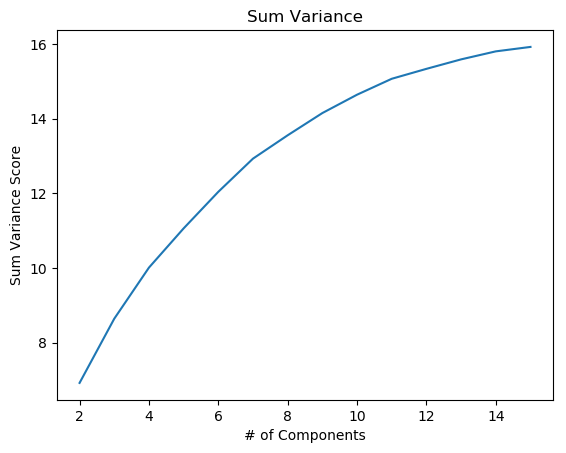

In [171]:
import matplotlib.pyplot as plt

# plot variance
plt.figure()
plt.title('Sum Variance')
plt.xlabel('# of Components')
plt.ylabel('Sum Variance Score')
plt.plot(dims, sum_variance)
plt.show()

As the dimensions are reduced the variance reduces, in other words, we are losing meaningful data as we drop components. 

So... what dimension should the data be reduced too?

Let's compare some scatter plots of dataframes with different principle components. 

<Figure size 640x480 with 0 Axes>

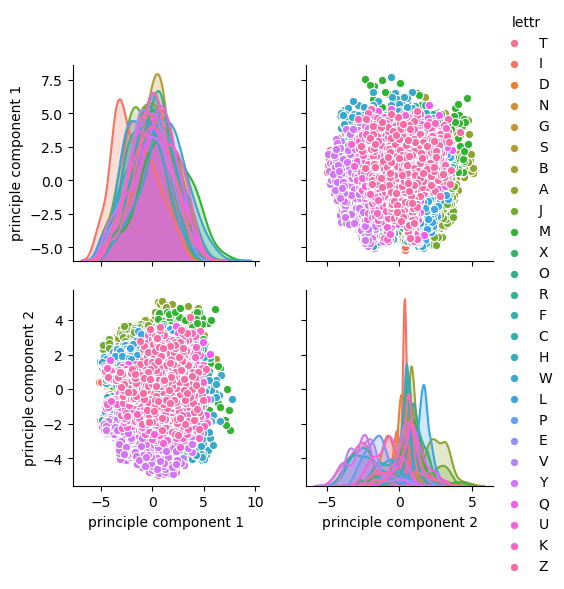

In [172]:
import seaborn as sns

# plot 2 component dataframe
df = dfs[0]
plt.figure()
sns.pairplot(df, vars=df.columns[:-1], hue = 'lettr')
plt.show()

<Figure size 640x480 with 0 Axes>

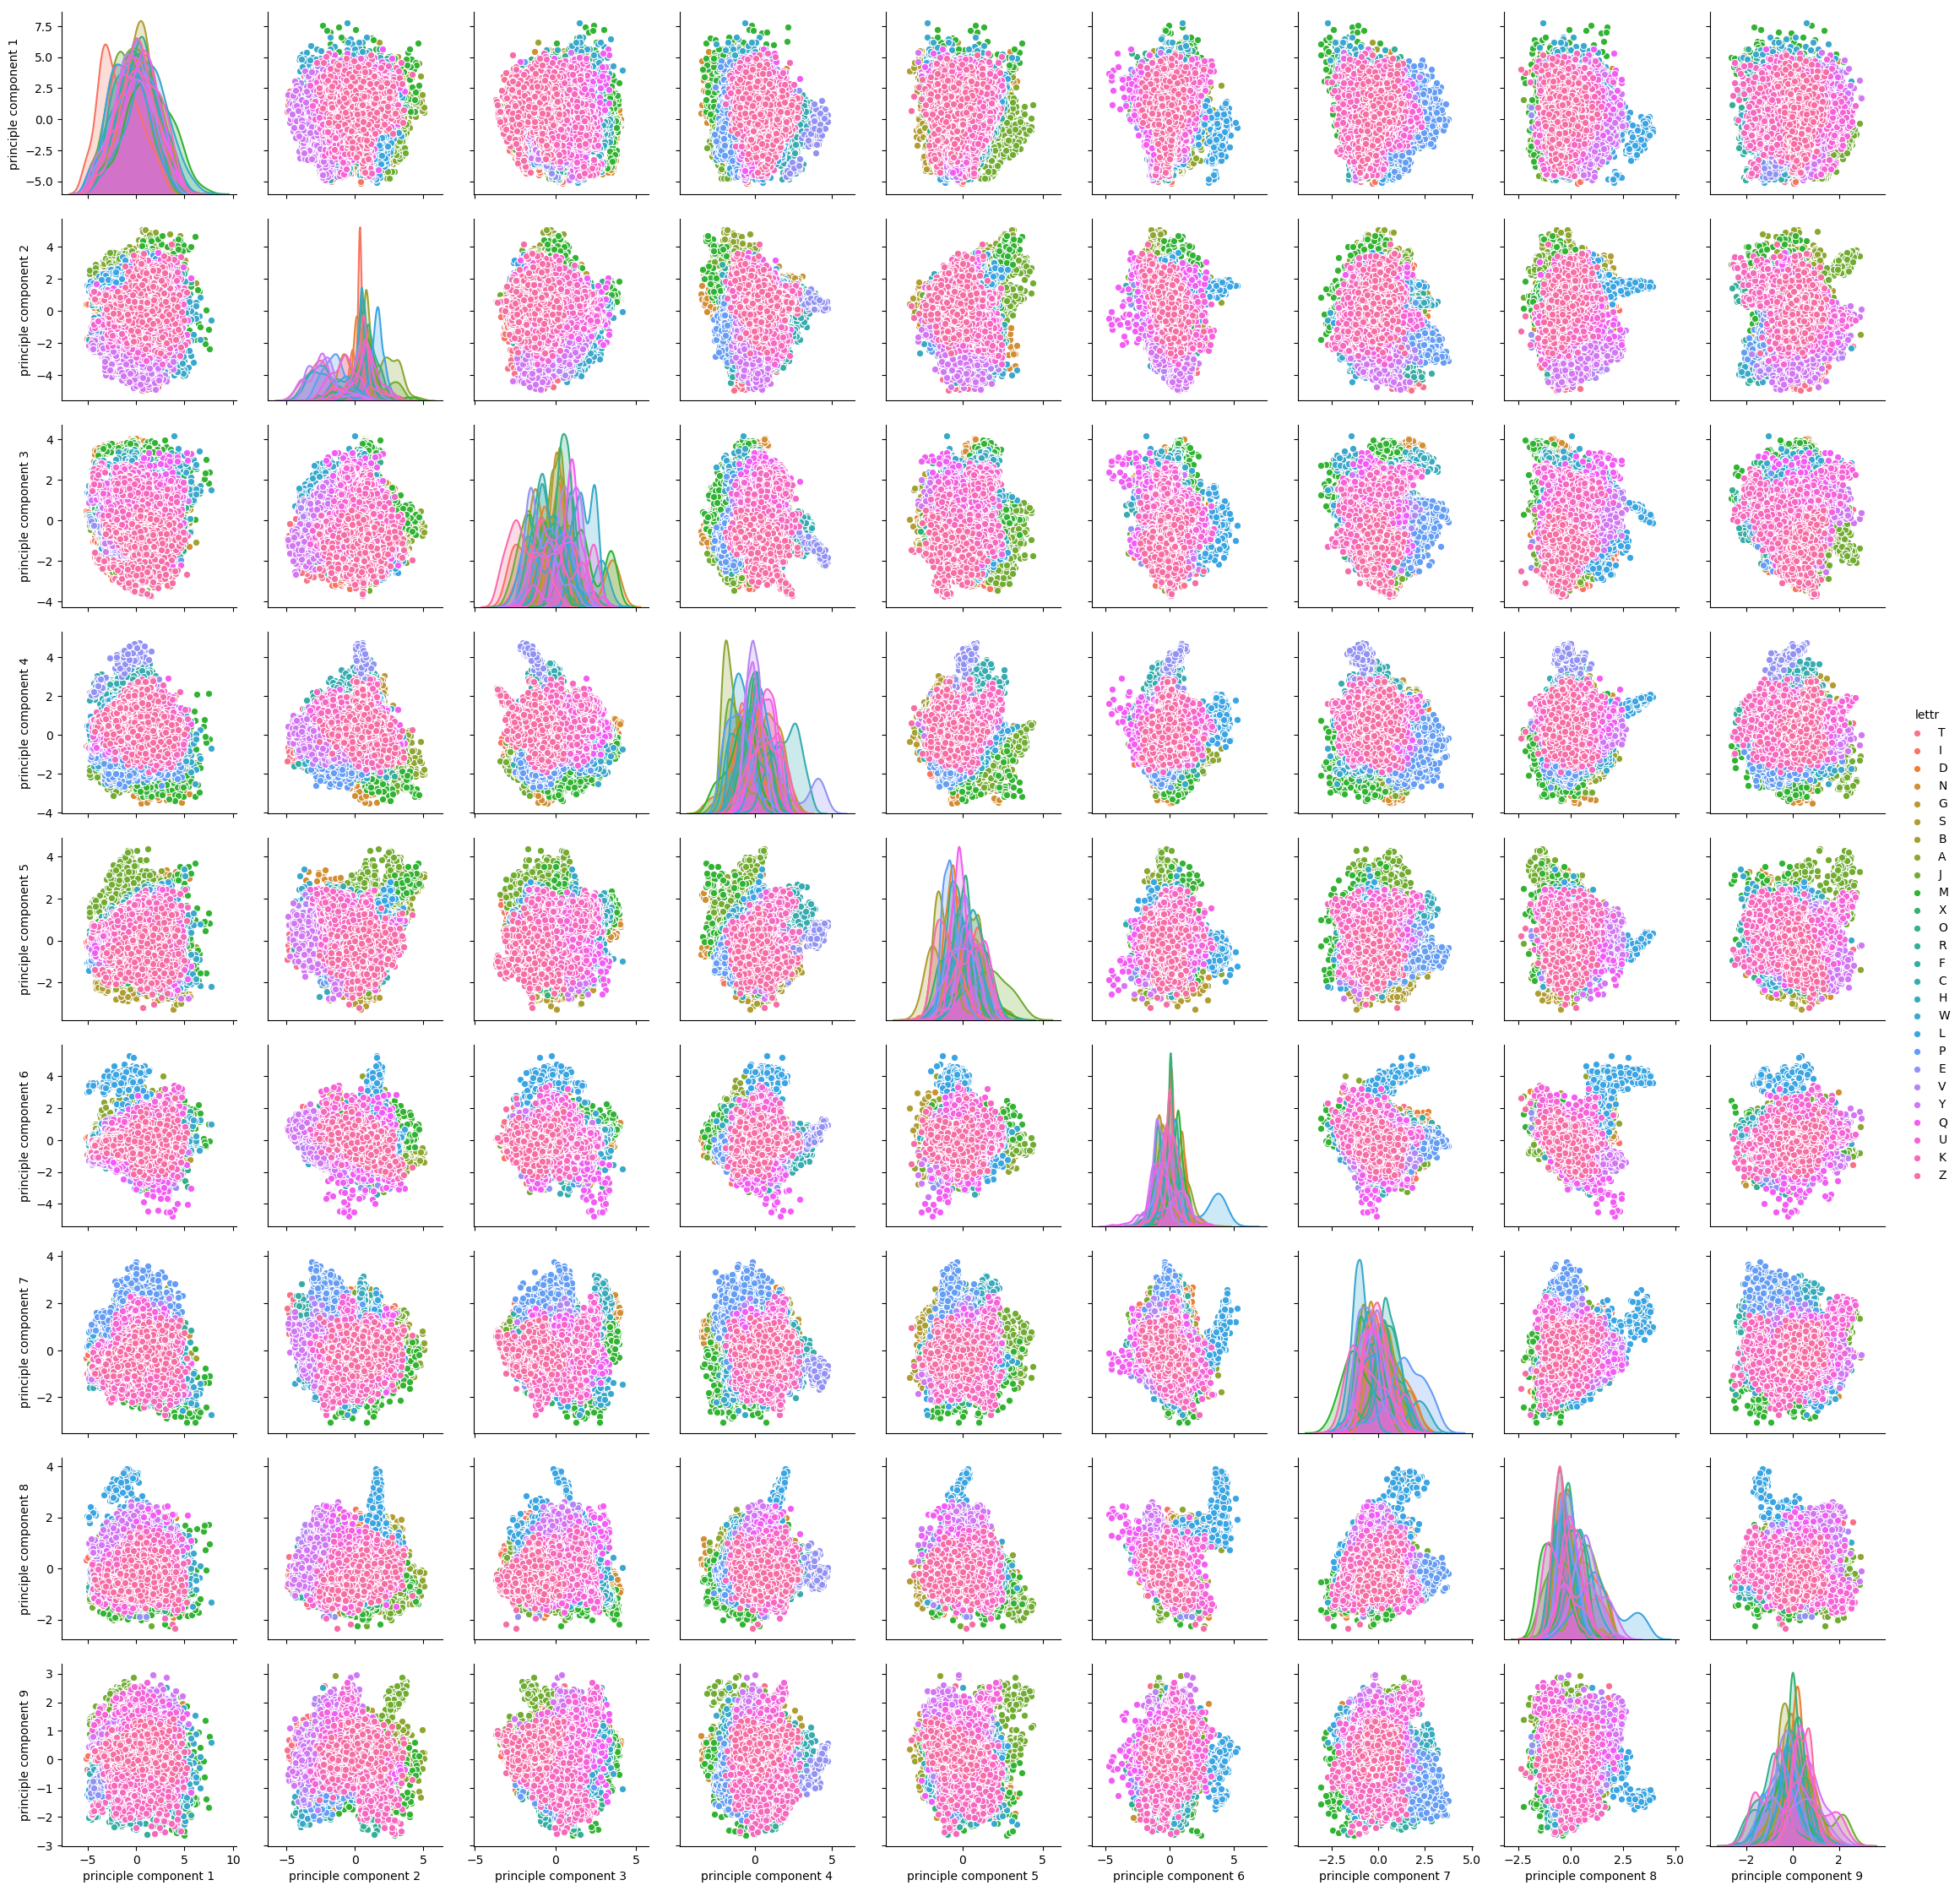

In [173]:
import seaborn as sns

# plot 6 components
df = dfs[7]
plt.figure()
sns.pairplot(df, vars=df.columns[:-1], hue = 'lettr')
plt.show()  

When the dataset is converted to two dimensions there appears to be more distinct groupings of each classification of letters than higher dimensions like 3. Although reduction will speed trainging, the cost of more distinct groupings based on the reduction to primary components also losses of variance.

# Training and Testing

We are training with four different classifiers. Each classifer has some parameters that can be tweaked to increase the performance either by speeding up the training or by increasing the accuracy of the testing.

#### $k$-Nearest-Neighbrors Classifier
    - optimize k between the range of 1 to max class distribution
    - create multiple training/testing splits with cross validation
        - help midigate oversizing and undersizing
    - test and train classifier with different numbers of components

    Class Distribution: 

    789 A	   766 B     736 C     805 D	 768 E	   775 F     773 G
    734 H	   755 I     747 J     739 K	 761 L	   792 M     783 N
    753 O	   803 P     783 Q     758 R	 748 S	   796 T     813 U
    764 V	   752 W     787 X     786 Y	 734 Z

In [174]:
max_k = 813//16
opt_score = 0.0001
opt_k = 1

# cross validate 3 different splits
cv = 3

Now let's train and test using the $k$ Neighbors Classifier

In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

k_list = range(1, max_k)
k_scores = []

d = 0
for df in dfs:
    
    # split target and features
    X = df.loc[:, headers[d]].values
    y = df.loc[:, target].values
    d+= 1
    
    # reset opt_values
    opt_score = 0.0001
    opt_k = 1
    
    
    for k in range(1,max_k): 

        # create classifier with k-neighbors
        knn = KNeighborsClassifier(n_neighbors=k)

        # store cross validation accuracy score
        scores = cross_val_score(knn, X, y, cv = cv, scoring = 'accuracy').mean()

        # check opt_score
        if opt_score < scores:
            opt_score = scores
            opt_k = k
    k_scores.append(opt_score)

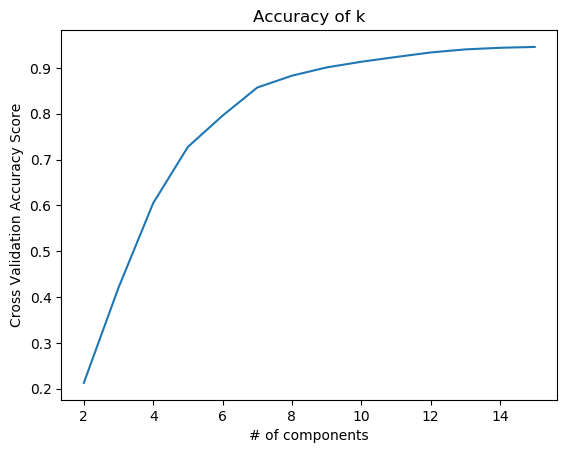

In [151]:
# plot opt_k value accuracy and # of components
plt.figure()
plt.title('Accuracy of k')
plt.xlabel('# of components')
plt.ylabel('Cross Validation Accuracy Score')
plt.plot(dims, k_scores)
plt.show()

## Decision trees
    - create multiple training/testing splits with cross validation
        - help midigate oversizing and undersizing
    - test and train classifier with different numbers of components


In [145]:
from sklearn import tree

clfscores = []

d = 0
for df in dfs:
    
    # split target and features
    X = df.loc[:, headers[d]].values
    y = df.loc[:, target].values
    d+= 1
    
    # create and store classifier and cross validation
    clf = tree.DecisionTreeClassifier()
    scores = cross_val_score(clf, X, y, cv = cv, scoring = 'accuracy').mean()
    clfscores.append(scores)

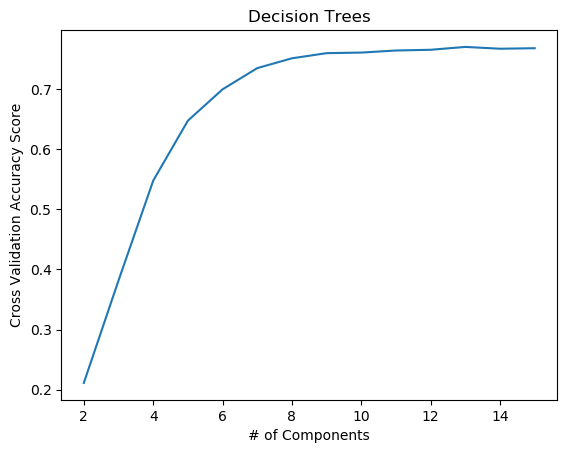

In [146]:
# plot number of components and accuracy
plt.figure()
plt.title('Decision Trees')
plt.xlabel('# of Components')
plt.ylabel('Cross Validation Accuracy Score')
plt.plot(dims, clfscores)
plt.show()

The accuracy of the decision tree classifier is .
Let's visualize the the decisions of the trees to find the princple components.

Primary Components in the Descion Tree
overfitting and underfitting?

## Random Forest Classification

    - create multiple training/testing splits with cross validation
        - help midigate oversizing and undersizing
    - test and train classifier with different numbers of components

In [125]:
from sklearn.ensemble import RandomForestClassifier

rfscores = []

d = 0
for df in dfs:
    
    # split target and features
    X = df.loc[:, headers[d]].values
    y = df.loc[:, target].values
    d+= 1
    
    rf = RandomForestClassifier()
    scores = cross_val_score(rf, X, y, cv = cv, scoring = 'accuracy').mean()
    rfscores.append(scores)

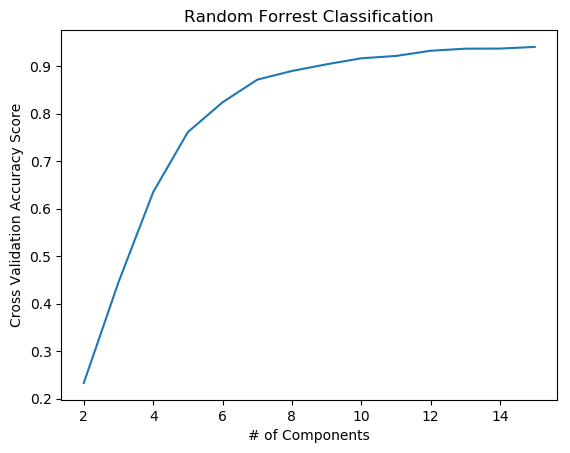

In [126]:
# plot number of components and accuracy
plt.figure()
plt.title('Random Forest Classification')
plt.xlabel('# of Components')
plt.ylabel('Cross Validation Accuracy Score')
plt.plot(dims, rfscores)
plt.show()

## Support Vector Machines

    - test the linear and poly kernels
    - create multiple training/testing splits with cross validation
        - help midigate oversizing and undersizing
    - test and train classifier with different numbers of components:

In [176]:
from sklearn import svm

lscores = []
pscores = []

d = 0
for df in dfs:
    
    # split target and features
    X = df.loc[:, headers[d]].values
    y = df.loc[:, target].values
    d += 1
    
    # linear kernel trainging
    svc = svm.SVC(kernel='linear')
    lsvc = svc.fit(X_train, y_train)
    lscore =cross_val_score(lsvc, X, y, cv = cv, scoring = 'accuracy').mean()
    lscores.append(lscore)
    
    # poly kernel trainging
    svc = svm.SVC(kernel='poly')
    psvc = svc.fit(X_train, y_train)
    pscore = cross_val_score(psvc, X, y, cv = cv, scoring = 'accuracy').mean()
    pscores.append(pscore)

print("linear accuracy: ", lscore)
print("poly accuracy: ", pscore)

linear accuracy:  0.8431498542084596
poly accuracy:  0.8750500968800945


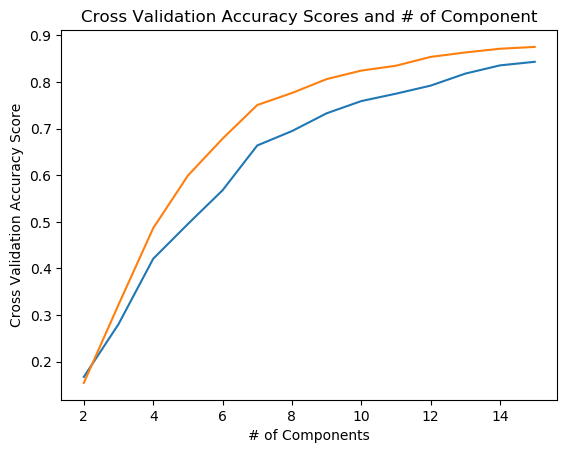

In [156]:
# plot 
plt.figure()
plt.title('Cross Validation Accuracy Scores and # of Component')
plt.xlabel('# of Components')
plt.ylabel('Cross Validation Accuracy Score')
plt.plot(dims, lscores)
plt.plot(dims, pscores)
plt.show()

# Comparing Classification Accuracy with Component Reduction

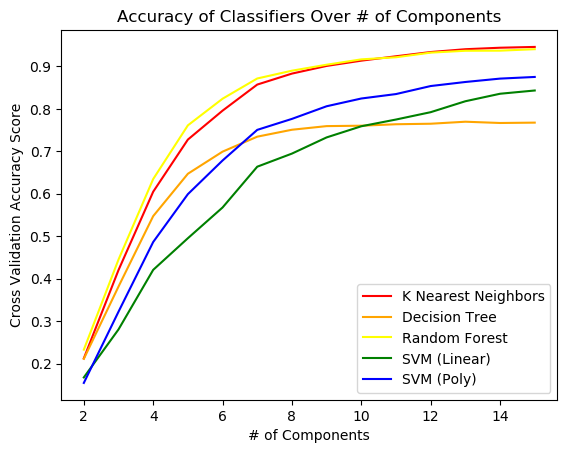

k-Nearest Neighbors max accuracy: 0.9457500722323621
Decision Tree max accuracy: 0.7696499738469421
Random Tree max accuracy: 0.9403997996919835
Support Vector Machine max accuracy: 0.8431498542084596


In [164]:
plt.figure()
plt.title('Accuracy of Classifiers Over # of Components')
plt.xlabel('# of Components')
plt.ylabel('Cross Validation Accuracy Score')

plt.plot(dims, k_scores, color="red", label="K Nearest Neighbors")
plt.plot(dims, clfscores, color="orange", label="Decision Tree")
plt.plot(dims, rfscores, color="yellow", label="Random Forest")
plt.plot(dims, lscores, color="green", label="SVM (Linear)")
plt.plot(dims, pscores, color="blue", label="SVM (Poly)")
plt.legend()
plt.show()

classifiers = ['k-Nearest Neighbors', 'Decision Tree', 'Random Tree', 'Support Vector Machine']
best_performance = [max(k_scores), max(clfscores),max(rfscores),max(lscores), max(pscores)]

for i in range(4):
    print(classifiers[i] + " max accuracy: " + str(best_performance[i]))